# A practical guide to constructing a classifier (in Python)

In this tutoral, you will learn to construct a linear classification model, and apply it to a simulated spam filtering task.

## Learning Objectives
By the end of this lab, you should understand the following:

* How to use basic math and machine learning modules in python such as numpy, matplotlib, and sklearn
* How to train ML models from scratch
* How to evaluate the test results and visualize the outcome of an ML model

## Loading math, machine learning, and visualization modules
We start importing some modules and running some magic commands

In [ ]:
%matplotlib inline

# General math and plotting modules.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Machine Learning library. 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


## Data loader

Loading and processing dataset (cf the statistical learning framework as introduced in module 1.1, 1.2).

In [ ]:
X, y = make_classification(n_features=2, 
                           n_redundant=0, 
                           n_informative=2,
                           random_state=1, 
                           n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 3*rng.uniform(size=X.shape)
linearly_separable = (X, y)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

## The key ingredient of model training: defining the loss

In the following exercise, you will write you own loss function for a binar classification task (cf module 1.1, 1,2). 

This could be used for binary classification applications such as spam filtering.


### The Logistic Regression Algorithm

The logistic loss is defined as: $$L(w; X, Y) = \sum_{i=1}^{N} L_{\sigma}(w; x_i, y_i) = \sum_{i=1}^{N} \log \left( 1 + \exp \left(-y_i w^\top x_i \right) \right) .$$

The loss function is differentiable, hence the gradient is:

$$ \frac{\partial L_{\sigma}(w; x_i, y_i)}{\partial w} = -\frac{\exp \left(-y_i w^\top x_i \right)}{1+\exp \left(-y_i w^\top x_i \right)} y x_i$$

In [ ]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    return 1/ (1 + np.exp(-z))

# Constructing "sigmoid" loss function for binary classification.
def lossFunction(theta, X, y ,Lambda):
    """
    Take in numpy array of theta, X, and y to return the regularize loss function and gradient
    of a logistic regression
    """
    m=len(y)
    y=y[:,np.newaxis]
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    loss = 1/m * sum(error)
    
    # regularized loss function with L2 regularizer
    regLoss = loss + Lambda/(2*m) * sum(theta**2)
    
    # compute gradient
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return regLoss[0], grad

# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))
# Set regularization parameter lambda to 1
Lambda = 0.1
Eta = 0.01
Tolerance=1e-6

#Compute and display initial loss and gradient for regularized logistic regression
loss, grad=lossFunction(initial_theta, X, y, Lambda)
print("Loss at initial theta (zeros):",loss)


Loss at initial theta (zeros): 0.693147180559946


Note that in Line 18, 
`regLoss = loss + Lambda/(2*m) * sum(theta**2)`
corresponds to the regularized loss function.

## Training your classifier

There are many algorithmic tools for training your classifier. Here, we use the popular gradient descent algorithm:

### Gradient Descent Algorithm:

The parameters $\hat{w}$ can be updated via a gradient descent rule: 

$$ \hat{w}_{k+1} \gets \hat{w}_k - \eta_k \left.\frac{\partial L}{\partial w} \right|_{w=w_k},$$

where $\eta_k$ is a parameter of the algorithm, $k$ is the iteration index, and $\frac{\partial L}{\partial w}$

Recall that the gradients of L with respect to the parameters are:

$$ \frac{\partial L_{\sigma}(w; x_i, y_i)}{\partial w} = -\frac{\exp \left(-y_i w^\top x_i \right)}{1+\exp \left(-y_i w^\top x_i \right)} y x_i$$

In the *vanilla* gradient descent method, $\eta(k)=\eta_0$ is a constant. However other algorithms exists that modify this.

The computational complexity of Gradient descent is $O(n_{\text{iter}} \cdot  n d)$. 

The regularized theta using ridge regression:
 [[-3.25276187]
 [ 0.17232828]]


Text(0.5, 1.0, 'Loss function using Gradient Descent')

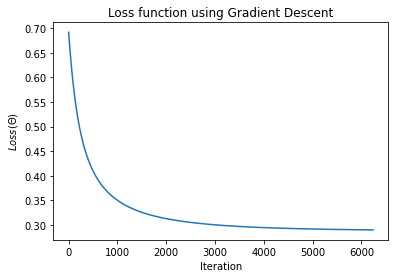

In [ ]:
def gradientDescent(X,y,theta,eta,Lambda,tolerance):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of eta
    
    return theta and the list of the loss of theta during each iteration
    """
    m=len(y)
    Loss_history =[]
    
    prev_loss = 10000
    loss, grad = lossFunction(theta,X,y,Lambda)

    while abs(loss - prev_loss) > tolerance:
        theta = theta - (eta * grad)
        prev_loss = loss
        loss, grad = lossFunction(theta,X,y,Lambda)
        
        Loss_history.append(loss)
    
    return theta , Loss_history

theta, Loss_history = gradientDescent(X,y,initial_theta,Eta,Lambda,Tolerance)
print("The regularized theta using ridge regression:\n",theta)

plt.plot(Loss_history)
plt.xlabel("Iteration")
plt.ylabel("$Loss(\Theta)$")
plt.title("Loss function using Gradient Descent")

## Test module

We still need a method to evaluate the model constructed.

In [ ]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

p=classifierPredict(theta,X_train)
print("Train Accuracy:", 
      (sum(p==y_train[:,np.newaxis])/len(y_train) *100)[0],"%")

p=classifierPredict(theta,X_test)
print("Test Accuracy:", 
      (sum(p==y_test[:,np.newaxis])/len(y_test) *100)[0],"%")

Train Accuracy: 86.66666666666667 %
Test Accuracy: 90.0 %


## Test run

Putting everything together, let's take a look at the final results.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.


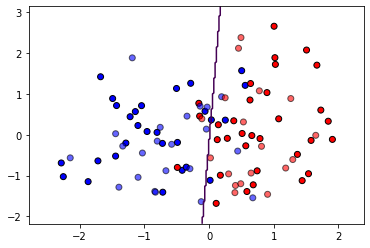

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# plot the dataset
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
            cmap=cm_bright,edgecolors='k')
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
            cmap=cm_bright, alpha=0.6,edgecolors='k')

grid = np.c_[xx.ravel(), yy.ravel()]
probs = sigmoid(grid @ theta).reshape(xx.shape)

plt.contour(xx,yy,np.round(probs),0)

## Going Further

For homework, follow the above pipeline and try out some other loss functions, and plot their performance for the above classification tasks.

Below are some alternative loss functions you may try out. These functions correspond to popular machine learning algorithms for classification:

### The Perceptron Algorithm

The perceptron loss is defined as: $$L(w; X, Y) =  \sum_{i=1}^{N} L_p(w; x_i, y_i) = \sum_{i=1}^{N} \max \{ 0, -y_i w^\top x_i \}.$$

The loss function is continuous, but not differentialbe at $y_i w^\top x_i=0$. The subgradient, however, exists and hence (stochastic) gradient descent converges. The subgradient is:

$$ \partial L_p(w; x_i,y_i) = \left\{\begin{array}{cc} 0 & \text{if } -y_i w^\top x_i < 0 \\ -y_i x_i & \text{if } -y_i w^\top x_i > 0 \\ \left[0, -y_i x_i \right] & \text{if } -y_i w^\top x_i = 0 \end{array}  \right. $$


### The SVM Algorithm

The svm loss is defined as: $$L(w; X, Y) =  \sum_{i=1}^{N} L_{\text{svm}} (w; x_i, y_i) =  \sum_{i=1}^{N} \max \{ 0, 1-y_i w^\top x_i \}.$$

The loss function is continuous, but not differentialbe at $y_i w^\top x_i=0$. The subgradient, however, exists and hence (stochastic) gradient descent converges. The subgradient is:

$$ \partial L_{\text{svm}}(w;x_i,y_i) = \left\{\begin{array}{cc} 0 & \text{if } 1-y_i w^\top x_i < 0 \\ -y_i x_i & \text{if } 1-y_i w^\top x_i > 0 \\ \left[0, -y_i x_i \right] & \text{if } 1-y_i w^\top x_i = 0 \end{array}  \right. $$

The difference with the perceptron loss is that the SVM loss includes a loss margin. 